In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline
%pylab inline

df = pd.read_csv('bank-additional/bank-additional-full-clean.csv', sep=";")
df.isnull().any()
df.dtypes

Populating the interactive namespace from numpy and matplotlib


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                  object
dtype: object

In [357]:
#sns.regplot(x="emp.var.rate", y="nr.employed", data=df)
df.dtypes
df.describe()
#df_data =  df.query('job != ["housemaid", "unemployed", "unknown", "self-employed", "entrepreneur"]')
df_data =  df.query('job != ["housemaid", "unemployed", "unknown", "management", "self-employed", "entrepreneur"]')
m = ols('yvalue ~  duration + job + month + pdays + poutcome  + nr_employed + contact + euribor3m  + cons_price_idx ',df_data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 yvalue   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     831.9
Date:                Fri, 04 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:48:36   Log-Likelihood:                -1678.0
No. Observations:               32983   AIC:                             3402.
Df Residuals:                   32960   BIC:                             3595.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

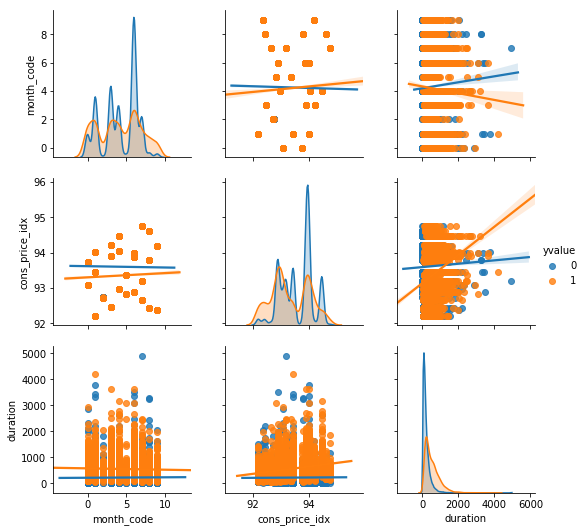

In [275]:

#sns.jointplot(x="duration", y="cons_price_idx", data=df, kind = 'reg', fit_reg = True, size = 10)
sns.pairplot(df, vars=['month_code', 'cons_price_idx', 'duration'], kind='reg', hue='yvalue')
plt.show()


In [279]:
df.describe()

df['yvalue'] = pd.Categorical(df.y).codes.astype(int)
df['married_code'] = pd.Categorical(df.marital).codes.astype(int)
df['education_code'] = pd.Categorical(df.education).codes.astype(int)
df['job_code'] = pd.Categorical(df.job).codes.astype(int)
df['contact_code'] = pd.Categorical(df.contact).codes.astype(int)
df['housing_code'] = pd.Categorical(df.housing).codes.astype(int)
df['loan_code'] = pd.Categorical(df.loan).codes.astype(int)
df['month_code'] = pd.Categorical(df.month).codes.astype(int)
df['day_code'] = pd.Categorical(df.day_of_week).codes.astype(int)
df['poutcome_code'] = pd.Categorical(df.poutcome).codes.astype(int)

#df.head()
df.sample(n=10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,yvalue,married_code,education_code,job_code,contact_code,housing_code,loan_code,month_code,day_code,poutcome_code
3035,31,blue-collar,married,basic.9y,no,no,yes,telephone,may,wed,...,0,1,2,1,1,0,2,6,4,1
40734,23,student,single,professional.course,no,yes,no,cellular,sep,wed,...,1,2,5,8,0,2,0,9,4,2
37296,69,retired,married,professional.course,no,yes,no,telephone,aug,mon,...,0,1,5,5,1,2,0,1,1,1
23826,29,admin.,single,university.degree,no,yes,no,cellular,aug,fri,...,0,2,6,0,0,2,0,1,0,1
37352,57,admin.,married,university.degree,no,yes,no,cellular,aug,tue,...,1,1,6,0,0,2,0,1,3,0
25262,41,blue-collar,married,professional.course,unknown,yes,no,cellular,nov,tue,...,0,1,5,1,0,2,0,7,3,1
15185,56,admin.,divorced,basic.6y,no,no,yes,cellular,jul,thu,...,0,0,1,0,0,0,2,3,2,1
2460,60,retired,married,university.degree,unknown,unknown,unknown,telephone,may,tue,...,0,1,6,5,1,1,1,6,3,1
14514,45,admin.,married,university.degree,no,yes,no,cellular,jul,tue,...,0,1,6,0,0,2,0,3,3,1
37518,44,unemployed,married,high.school,no,yes,no,cellular,aug,thu,...,0,1,3,10,0,2,0,1,2,2


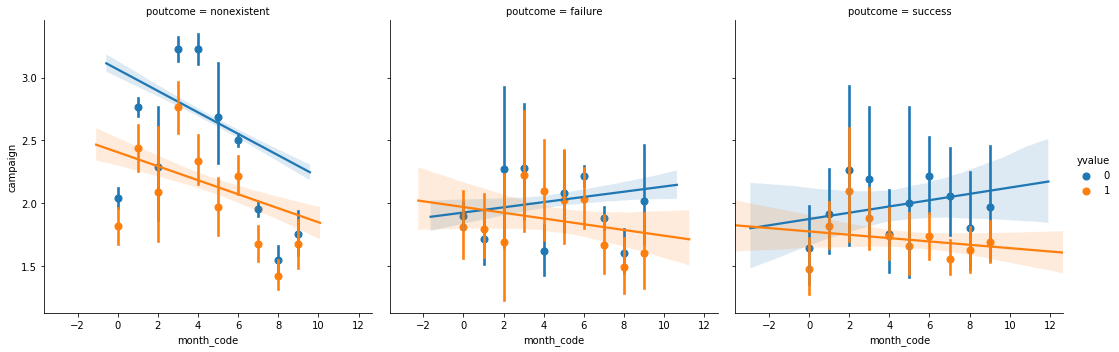

In [366]:
sns.lmplot(hue="yvalue", col='poutcome', y = "campaign", x="month_code", data=df, x_estimator=np.mean)
plt.show()

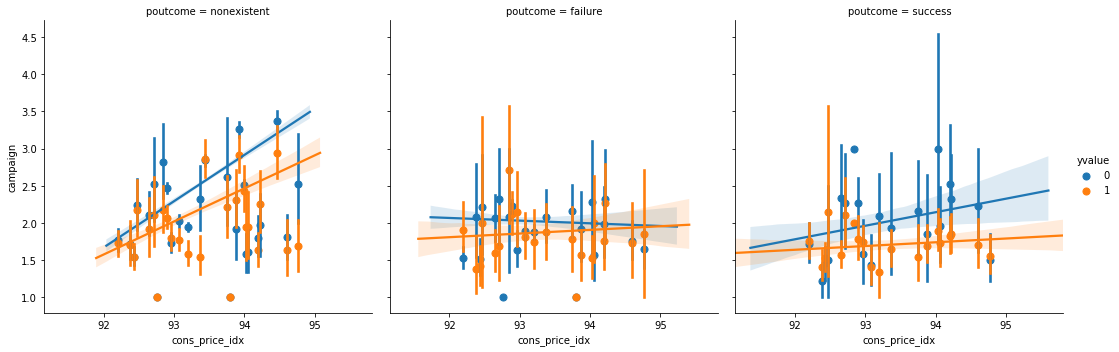

In [355]:
sns.lmplot(hue="yvalue", col='poutcome', y = "campaign", x ="cons_price_idx", data=df, x_estimator=np.mean)
plt.show()

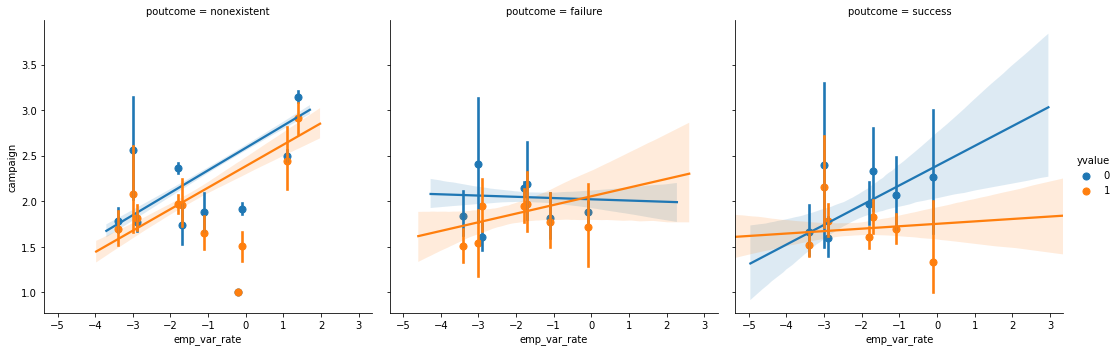

In [364]:
sns.lmplot(hue="yvalue", col='poutcome', y = "campaign", x ="emp_var_rate", data=df.query('job != ["housemaid", "unemployed", "unknown", "self-employed", "entrepreneur"]'), x_estimator=np.mean)
plt.show()

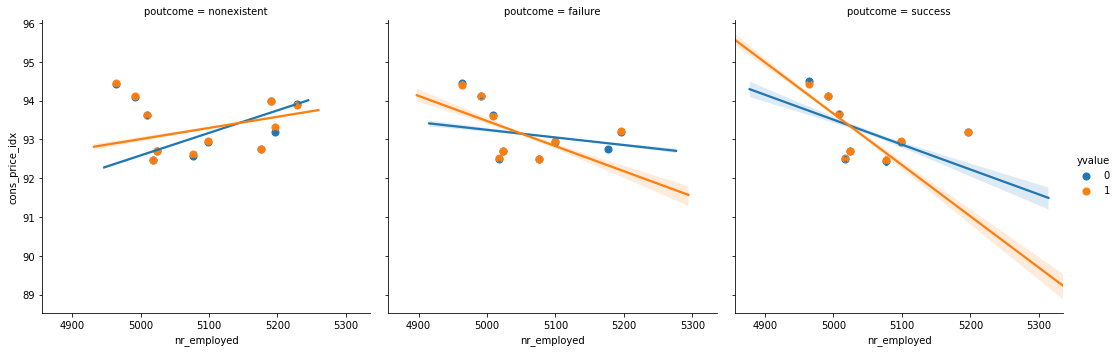

In [363]:
sns.lmplot(hue="yvalue", col='poutcome', x = "nr_employed", y ="campaign", data=df, x_estimator=np.mean)
plt.show()